# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data Transformation
5. Data visualization
6. Modelling
7. Model training

In [30]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [6]:
# Load dataset
d = pd.read_csv('heart.csv')

# Inspect data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

# Descriptive statistics of data

In [8]:
# Print summary statistics
df_description = df.describe().T 
print(df_description)

print("\n")

# Print DataFrame information
df_info = df.info()
print(df_info)

          count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277

The describe method gives us a lot of information about the heart disease data. The key point to take away from this is that we have highly skewed data, as exhibited by the percentile values.

# Data Transformation

In [9]:
df_heart = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [10]:
df_heart.replace({
    'sex': {0: 'Female', 1: 'Male'},
    'chest_pain_type': {1: 'Atypical Angina', 2: 'Non-Anginal Pain', 0: 'Asymptomatic', 3: 'Asymptomatic'},
    'fasting_blood_sugar': {0: '<=120mg/ml', 1: '>120mg/ml'},
    'resting_electrocardiogram': {0: 'Normal', 1: 'Abnormality', 2: 'Left Ventricular Hypertrophy'},
    'exercise_induced_angina': {0: 'No', 1: 'Yes'},
    'st_slope': {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'},
    'thalassemia': {1: 'Fixed Defect', 2: 'Normal', 3: 'Reversable defect'}
}, inplace=True)

In [11]:
# Inspect data
df_heart.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,Male,Asymptomatic,145,233,>120mg/ml,Normal,150,No,2.3,Upsloping,0,Fixed Defect,1
1,37,Male,Non-Anginal Pain,130,250,<=120mg/ml,Abnormality,187,No,3.5,Upsloping,0,Normal,1
2,41,Female,Atypical Angina,130,204,<=120mg/ml,Normal,172,No,1.4,Downsloping,0,Normal,1
3,56,Male,Atypical Angina,120,236,<=120mg/ml,Abnormality,178,No,0.8,Downsloping,0,Normal,1
4,57,Female,Asymptomatic,120,354,<=120mg/ml,Abnormality,163,Yes,0.6,Downsloping,0,Normal,1


In [43]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    object 
 2   chest_pain_type            303 non-null    object 
 3   resting_blood_pressure     303 non-null    int64  
 4   cholesterol                303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    object 
 6   resting_electrocardiogram  303 non-null    object 
 7   max_heart_rate_achieved    303 non-null    int64  
 8   exercise_induced_angina    303 non-null    object 
 9   st_depression              303 non-null    float64
 10  st_slope                   303 non-null    object 
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    object 
 13  target                     303 non-null    int64  

# EDA

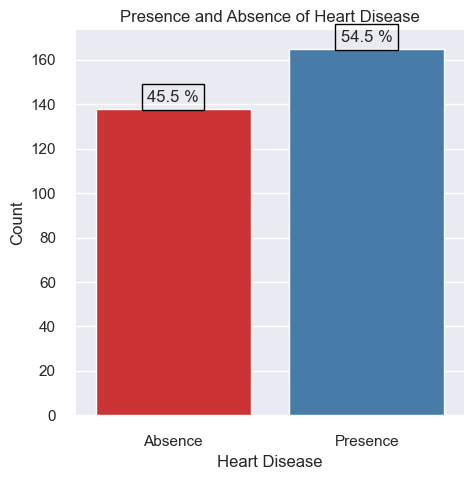

In [24]:
# Bar plot for target {heart disease}
plt.figure(figsize=(5, 5))
total = float(len(df_heart))
ax = sns.countplot(x='target', data=df_heart, palette='Set1')
ax.set_title('Presence and Absence of Heart Disease')
ax.set_xlabel('Heart Disease')
ax.set_ylabel('Count')
target_labels = {0: 'Absence', 1: 'Presence'}
ax.set_xticklabels([target_labels[tick] for tick in ax.get_xticks()])
for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black'))
sns.despine(right=True)
sns.despine(offset=5, trim=True)
plt.show()

In [25]:
# How many of the patients have the heart disease?
df_heart.groupby('sex')['target'].value_counts()

sex     target
Female  1          72
        0          24
Male    0         114
        1          93
Name: count, dtype: int64

In [26]:
df_heart.groupby('sex')['target'].value_counts(normalize=True)

sex     target
Female  1         0.750000
        0         0.250000
Male    0         0.550725
        1         0.449275
Name: proportion, dtype: float64

In [28]:
# Distribution of categorical features
df_cat= ['chest_pain_type', 'fasting_blood_sugar', 'exercise_induced_angina','resting_electrocardiogram',
         'st_slope', 'thalassemia']

C:\Users\mzing\AppData\Local\Temp\ipykernel_16436\89197499.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
C:\Users\mzing\AppData\Local\Temp\ipykernel_16436\89197499.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
C:\Users\mzing\AppData\Local\Temp\ipykernel_16436\89197499.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
C:\Users\mzing\AppData\Local\Temp\ipykernel_16436\89197499.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is depr

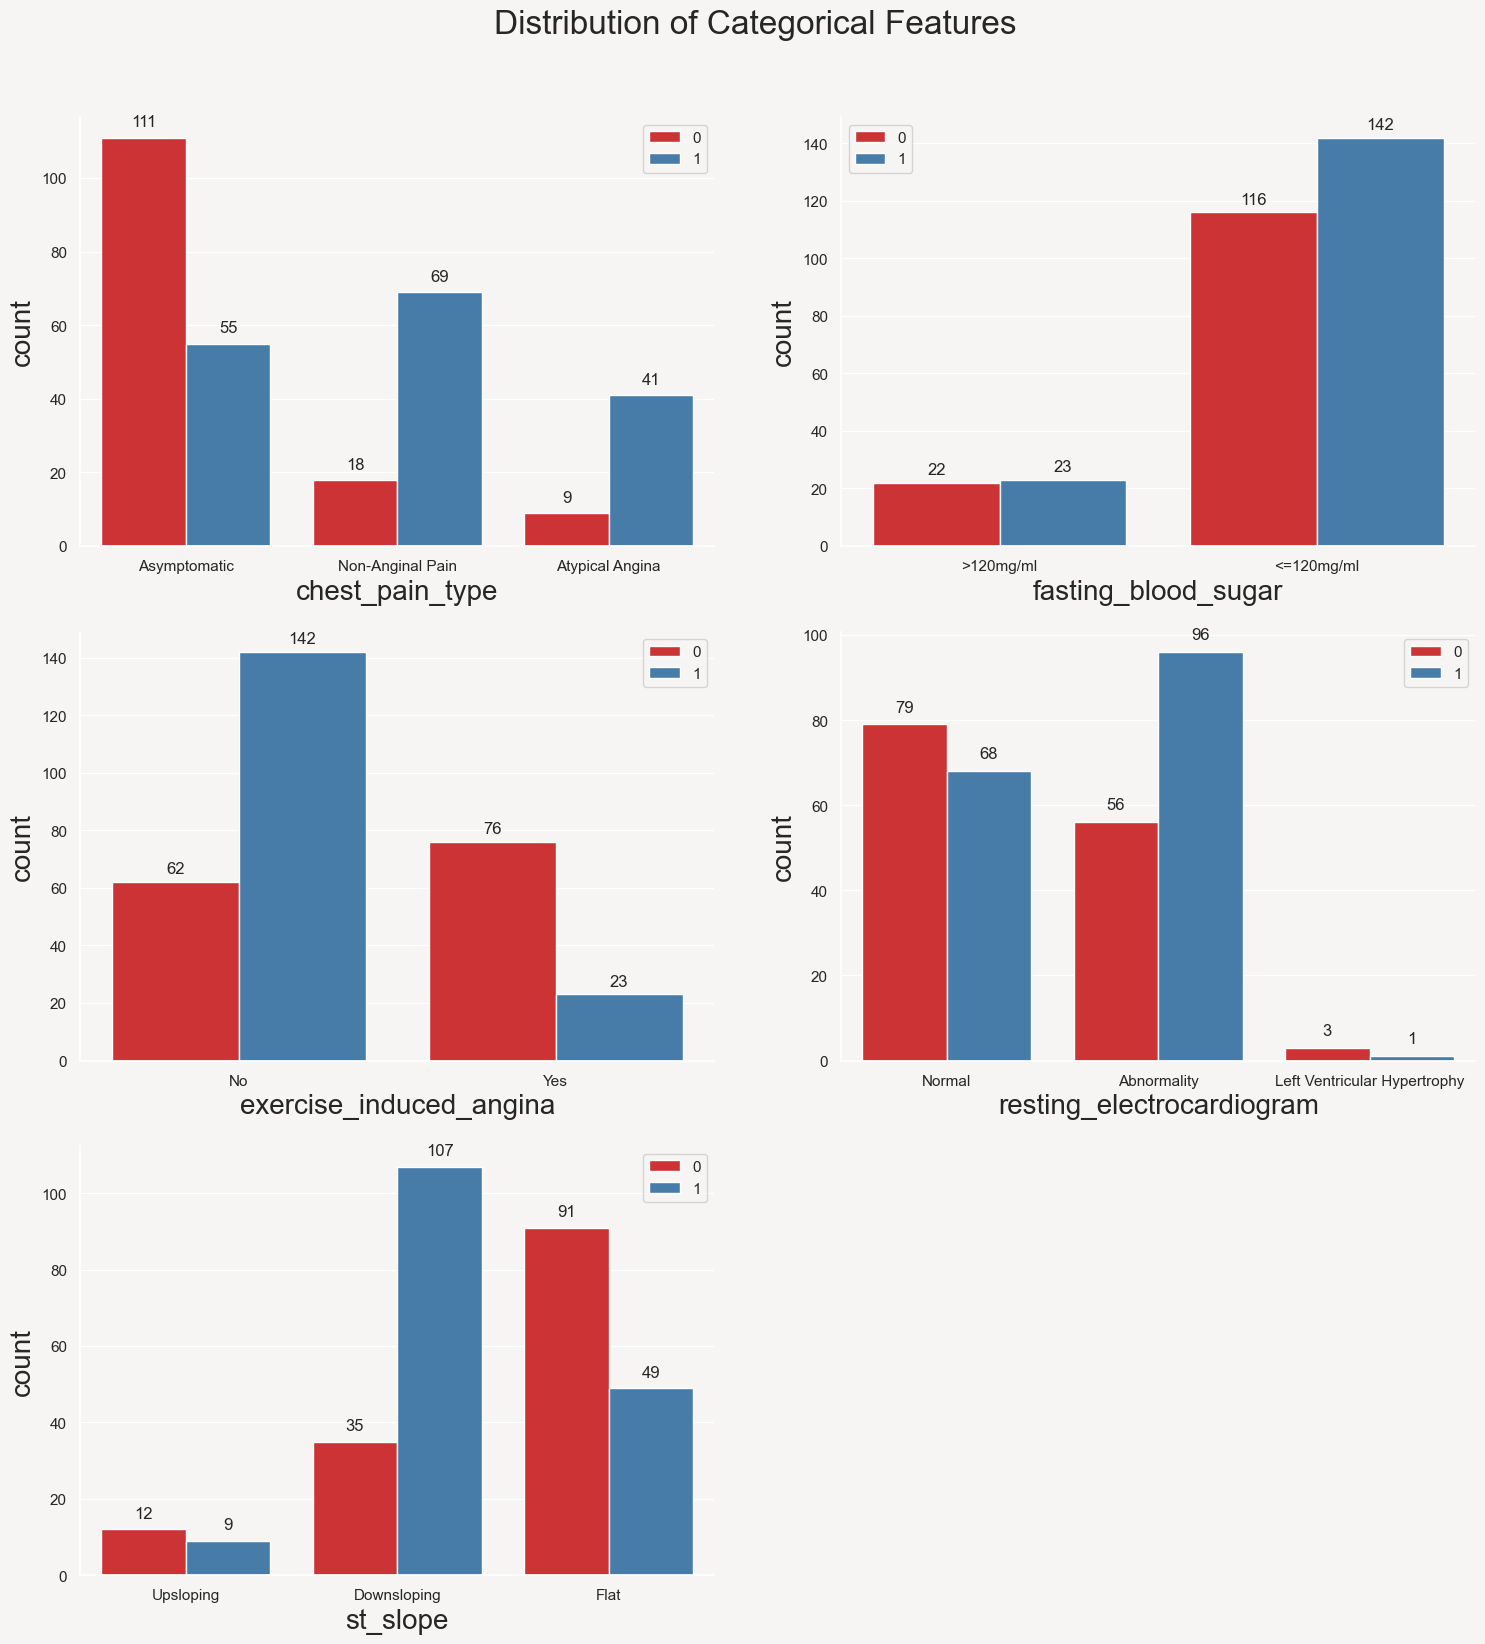

In [34]:
def count_plot(df_heart, df_cat):    
    L = len(df_cat)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 18), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in df_cat:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=df_heart, x=col, hue="target", palette='Set1')
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center")
        
        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(df_heart, df_cat[0:-1]);

C:\Users\mzing\AppData\Local\Temp\ipykernel_16436\3781514218.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\mzing\AppData\Local\Temp\ipykernel_16436\3781514218.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\mzing\AppData\Local\Temp\ipykernel_16436\3781514218.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mzing\AppData\Local\Temp\ipykernel_16436\3781514218.py:18: MatplotlibDeprecationWarning: The seaborn styles s

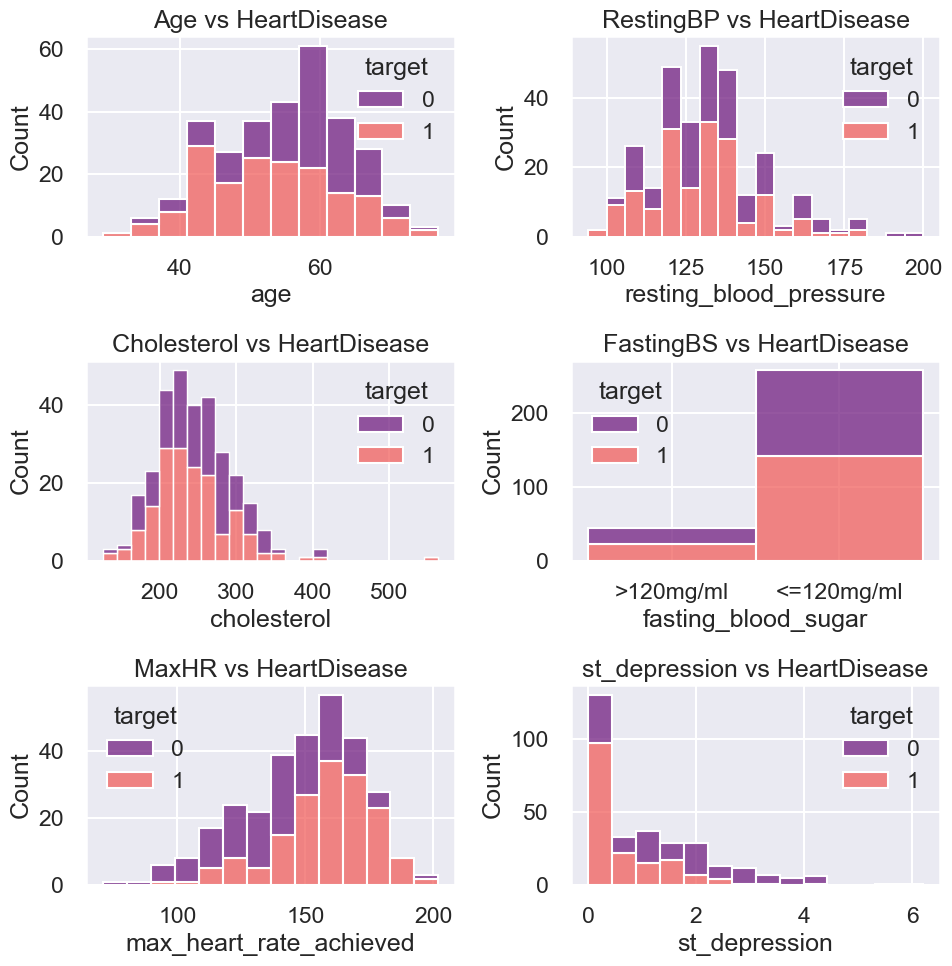

In [42]:
# Distribution of numerical features
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df_heart, x='age', hue="target",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df_heart, x='resting_blood_pressure', hue="target",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df_heart, x='cholesterol', hue="target",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df_heart, x='fasting_blood_sugar', hue="target",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df_heart, x='max_heart_rate_achieved', hue="target",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df_heart, x='st_depression', hue="target",multiple="stack",palette='magma')
plt.title('st_depression vs HeartDisease')
plt.show()

C:\Users\mzing\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\mzing\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


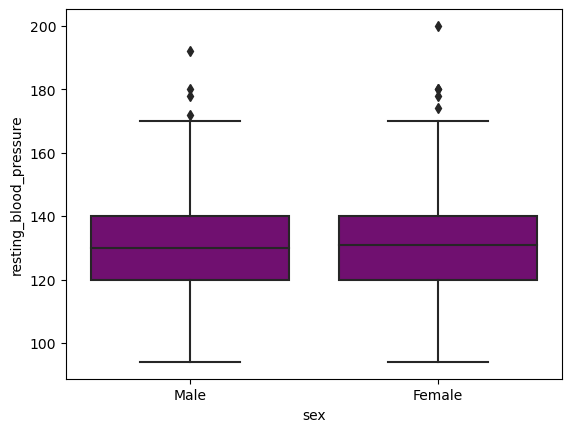

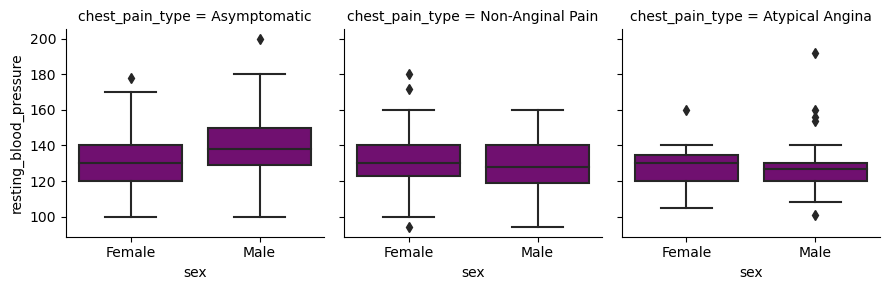

In [34]:
sns.boxplot(x='sex', y='resting_blood_pressure', data=df_heart, palette=['purple'])
plt.xlabel('sex')
plt.ylabel('resting_blood_pressure')
g = sns.FacetGrid(df_heart, col='chest_pain_type')
g.map(sns.boxplot, 'sex', 'resting_blood_pressure', order=['Male', 'Female'],palette=['purple'])
plt.show()

C:\Users\mzing\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


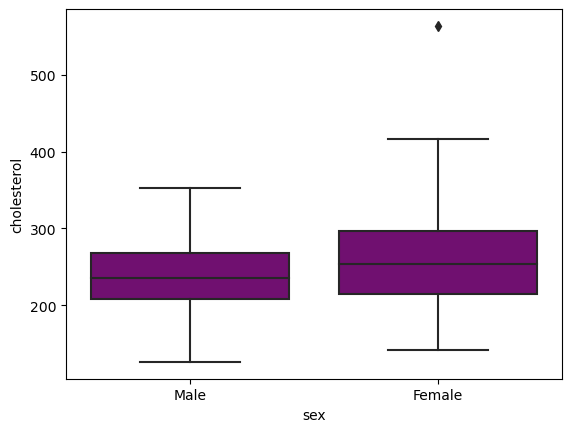

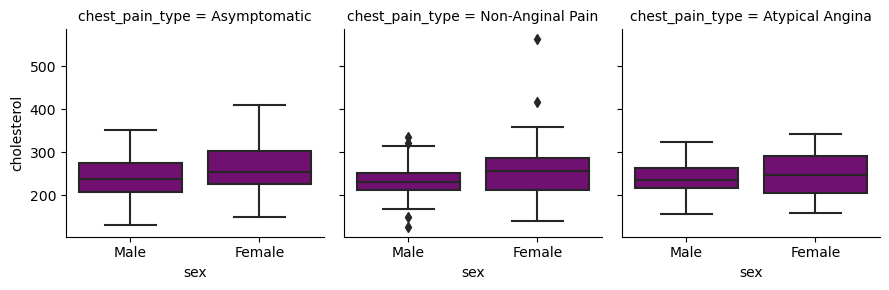

In [33]:
sns.boxplot(x='sex', y='cholesterol', data=df_heart, palette=['purple'])
plt.xlabel('sex')
plt.ylabel('cholesterol')
g = sns.FacetGrid(df_heart, col='chest_pain_type')
g.map(sns.boxplot, 'sex', 'cholesterol', order=['Male', 'Female'], palette=['purple'])
plt.show()

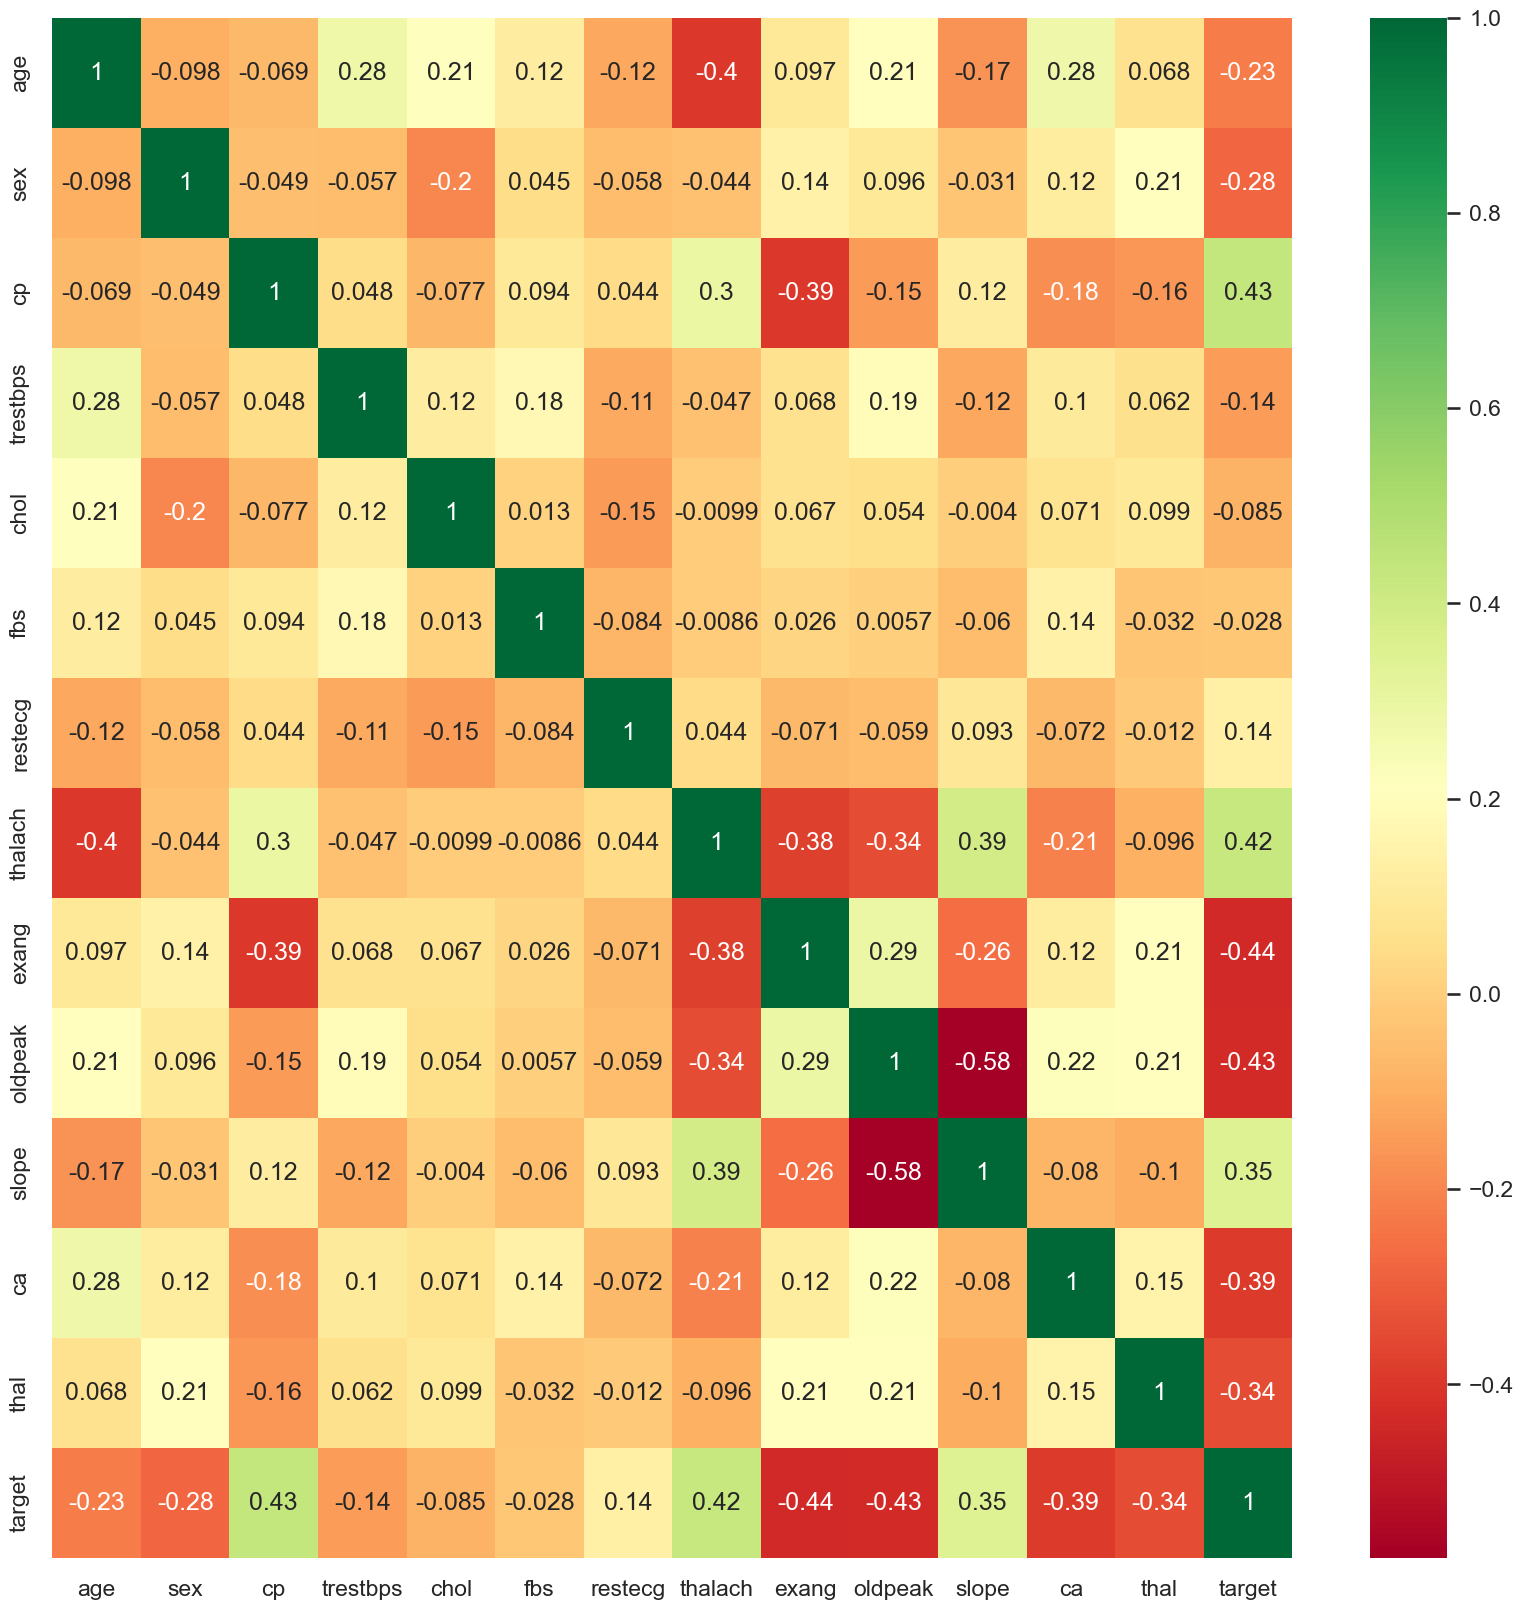

In [37]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Modelling 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
scaler.fit(df.drop('target',axis = 1))
StandardScaler()
scaled_features = scaler.transform(df.drop('target',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [47]:
col=df.describe().columns.to_list()
print(col)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [66]:
# split into train and test
X = df_feat
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227, 13)
(227,)
(76, 13)
(76,)


# Model training

In [67]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [59]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [63]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [69]:
model_xgb = xgb.XGBClassifier(
        n_estimators=1000)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Evaluation

We are going to use 3 metrics to evaluate performance:

- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples

In [60]:
# RandomForest Classifier
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [64]:
# LogisticRegression
predictions_lr = model_lr.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_lr).ravel()

In [70]:
# XGBoost Classifier
predictions_xgb = model_xgb.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_xgb).ravel()

In [61]:
y_test.value_counts()

target
1    41
0    35
Name: count, dtype: int64

In [62]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 36
False positives: 8
True negatives: 27
False negatives: 5

Accuracy: 0.8289473684210527
Precision: 0.8181818181818182
Recall: 0.8780487804878049


The performance of the RandomForest Classifier was as follows:

- True Positives (TP): The model correctly predicted 36 instances where heart disease was present.
- False Positives (FP): The model incorrectly predicted 8 instances as having heart disease when they did not.
- True Negatives (TN): The model correctly identified 27 instances where heart disease was absent.
- False Negatives (FN): The model missed 5 instances where heart disease was actually present.

The key metrics for evaluating the model’s performance were:

**Accuracy:** The proportion of total predictions that were correct, calculated as 

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

which is approximately **82.89%.**

**Precision:** The proportion of positive identifications that were actually correct, calculated as

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

which is approximately **81.82%.**

**Recall (Sensitivity):** The proportion of actual positives that were identified correctly, calculated as

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

which is approximately **87.80%**

These results indicate that the RandomForest Classifier is quite effective in predicting heart disease, with high recall indicating it is particularly good at identifying patients with the disease. However, there is still room for improvement in reducing false positives to increase precision.

In [65]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions_lr)}")
print(f"Precision: {metrics.precision_score(y_test, predictions_lr)}")
print(f"Recall: {metrics.recall_score(y_test, predictions_lr)}")

True positives: 36
False positives: 5
True negatives: 30
False negatives: 5

Accuracy: 0.868421052631579
Precision: 0.8780487804878049
Recall: 0.8780487804878049


The Logistic Regression model was evaluated on a dataset with outcomes indicating the presence or absence of heart disease.
The results are as follows:

- True Positives (TP): The model correctly predicted 36 instances where heart disease was present.
- False Positives (FP): The model incorrectly predicted 5 instances as having heart disease when they did not.
- True Negatives (TN): The model correctly identified 30 instances where heart disease was absent.
- False Negatives (FN): The model missed 5 instances where heart disease was actually present.

The key metrics for evaluating the model’s performance were:

**Accuracy:** The proportion of total predictions that were correct, calculated as 

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

which is approximately **86.84%.**

**Precision:** The proportion of positive identifications that were actually correct, calculated as

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

which is approximately **87.80%.**

**Recall (Sensitivity):** The proportion of actual positives that were identified correctly, calculated as

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

which is approximately **87.80%**

These results suggest that the Logistic Regression model is quite reliable, with a good balance between precision and recall, indicating it is effective at identifying patients with heart disease while maintaining a low rate of false positives. The accuracy of nearly 87% is commendable and shows the model’s strong predictive power in this context.

In [71]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions_xgb)}")
print(f"Precision: {metrics.precision_score(y_test, predictions_xgb)}")
print(f"Recall: {metrics.recall_score(y_test, predictions_xgb)}")

True positives: 33
False positives: 7
True negatives: 28
False negatives: 8

Accuracy: 0.8026315789473685
Precision: 0.825
Recall: 0.8048780487804879


The XGBoost Classifier was tasked with predicting the presence (1) or absence (0) of heart disease.
The results of the model’s predictions are as follows:

- True Positives (TP): Correctly identified 33 cases of heart disease.
- False Positives (FP): Incorrectly identified 7 cases as having heart disease.
- True Negatives (TN): Correctly identified 28 cases as not having heart disease.
- False Negatives (FN): Failed to identify 8 cases of heart disease.

The key metrics for evaluating the model’s performance were:

**Accuracy:** The proportion of total predictions that were correct, calculated as 

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

which is approximately **80.26%.**

**Precision:** The proportion of positive identifications that were actually correct, calculated as

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

which is approximately **82.5%.**

**Recall (Sensitivity):** The proportion of actual positives that were identified correctly, calculated as

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

which is approximately **80.49%**

These results indicate that the XGBoost Classifier has a good level of accuracy and is fairly reliable in identifying patients with heart disease. However, there is a balance to be struck between reducing false positives and false negatives to further improve the model’s precision and recall. Overall, the model demonstrates a solid foundation for predicting heart disease with an accuracy of over 80%.

# Model Comparison

When comparing the performance of the RandomForest Classifier, Logistic Regression, and XGBoost Classifier for heart disease prediction, here’s how they stack up:

**RandomForest Classifier:**

- Accuracy: 82.89%
- Precision: 81.82%
- Recall: 87.80%

**Logistic Regression:**

- Accuracy: 86.84%
- Precision: 87.80%
- Recall: 87.80%

**XGBoost Classifier:**

- Accuracy: 80.26%
- Precision: 82.5%
- Recall: 80.49%

**Comparison Summary:**

**Accuracy:** Logistic Regression > RandomForest > XGBoost
**Precision:** Logistic Regression > XGBoost > RandomForest
**Recall:** Logistic Regression = RandomForest > XGBoost

**Logistic Regression** stands out with the highest **accuracy** and **precision**, indicating it made the most correct predictions overall and had the highest rate of true positives out of all positive predictions. Its recall rate is also the highest, tied with RandomForest, suggesting it is best at identifying true cases of heart disease.

**RandomForest Classifier** shows slightly lower **accuracy** and **precision** but has a high **recall** rate, indicating it is also effective at identifying true cases of heart disease, albeit with a slightly higher rate of false positives.

**XGBoost Classifier**, while still performing well, shows the lowest **accuracy** and **recall** among the three models. It has a moderate precision rate, indicating a balanced approach to predicting true positives and avoiding false positives.


In conclusion, **Logistic Regression** appears to be the most effective model for this particular heart disease prediction task, with the highest scores across all three metrics, suggesting a good balance between identifying true cases and avoiding false alarms. However, the choice of model may also depend on the specific requirements of the task, such as whether minimizing false positives or false negatives is more critical.

# Fit and Parameter Tune models 

In [75]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [76]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
}


# Hyperparameter tuning and evaluation
grids = {}
for model_name, model in models.items():
    print(f"Hyperparameter tuning for {model_name}:")
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name],
                               scoring='accuracy', cv=cv, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters: {best_params}")
    print(f"Best Accuracy Score on validation set: {best_score}\n")

    # Evaluate on test set
    y_pred = grid_search.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    print(f"Accuracy Score on test set: {test_accuracy}")
    print(f"Precision Score on test set: {test_precision}")
    print(f"Recall Score on test set: {test_recall}\n")


Hyperparameter tuning for Logistic Regression:
Best parameters: {'C': 1, 'max_iter': 100}
Best Accuracy Score on validation set: 0.797391304347826

Accuracy Score on test set: 0.868421052631579
Precision Score on test set: 0.8780487804878049
Recall Score on test set: 0.8780487804878049

Hyperparameter tuning for Random Forest:
Best parameters: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy Score on validation set: 0.8195169082125604

Accuracy Score on test set: 0.8421052631578947
Precision Score on test set: 0.8372093023255814
Recall Score on test set: 0.8780487804878049

Hyperparameter tuning for XGBoost:
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.9}
Best Accuracy Score on validation set: 0.8459903381642512

Accuracy Score on test set: 0.8157894736842105
Precision Score on test set: 0.813953488372093
Recall Score on test set: 0.8536585365853658



After hyperparameter tuning, Logistic Regression showed the best performance on the test set across all three metrics, indicating a robust model with a good balance between identifying true positives and avoiding false positives. Random Forest followed closely, with a slightly lower precision but equal recall to Logistic Regression. XGBoost, while having the highest accuracy on the validation set, performed slightly lower on the test set compared to the other two models. These results highlight the importance of hyperparameter tuning in optimizing model performance and the potential differences in how models generalize from validation to test data.

# ROC Curve

Training Logistic Regression...
Training Random Forest...
Training XGBoost...


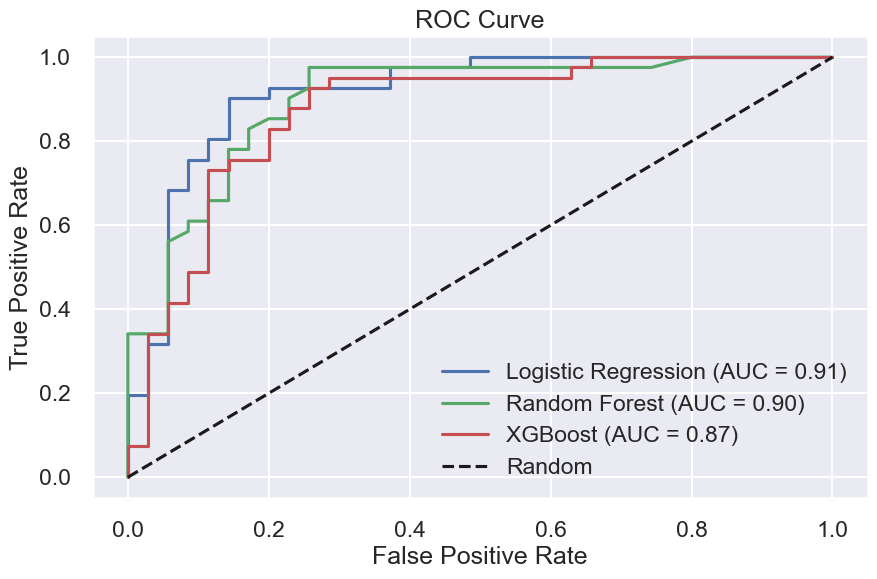

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
}

# Train each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10],
                            'max_iter': [100, 200, 300]},
    'Random Forest': {'n_estimators': [50, 100, 200],
                      'max_depth': [5, 10, 15],
                      'min_samples_split': [2, 5, 10]},
    'XGBoost': {'max_depth': [3, 5, 7],
                'learning_rate': [0.05, 0.1, 0.2],
                'n_estimators': [50, 100, 200],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]},
}

# Train each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
# Predict probabilities for positive class
probs = {}
for model_name, model in models.items():
    probs[model_name] = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each model
plt.figure(figsize=(10, 6))
for model_name, prob in probs.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()